# Diagnosing Hypothyroid disease using Deep Learning

Hypothyroid disease or Hypothyroidism is one of the most difficult diseases to diagnose. It is a condition which causes your thyroid gland to not produce enough of certain crucial hormones. It usually may not cause noticeable symptoms in the early stages and hence becomes extremely difficult to diagnose. Applying deep learning algorithms can help assist healthcare workers in identifying signs and symptoms based on patterns shown in past cases of patients' data.

In this tutorial, we will be learning the code and workflow for diagnosing whether or not a person is suffering from Hypothyroid disease based on various metrics.

## Importing necessary libraries

We will start by importing the necessary libraries in Python.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle # For saving models
import matplotlib.pyplot as plt # For plotting figures
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

# For building our model
import keras
from keras.models import Sequential
from keras.layers import Dense

## Data

- We are using the hypothyroid data for training our model. 
- The dataset contains the value of different hormone levels of different patients along with our target variable, i.e., if the patient was suffering from hypothyroidism or not. 
- To start using it, you can download the dataset from [here](https://drive.google.com/file/d/11A-9z9BgfyuD8IpvXpjmmc-Js5cAw0I4/view?usp=sharing) and save it into a folder named “data”. We can then load the csv dataset using pandas.

In [2]:
# Load dataset from csv using pandas
dataset = pd.read_csv('data/hypothyroid.csv')
dataset.head()

,Unnamed: 0,Age,Gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [3]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

**The dataset contains several features related to the patient such as age, gender, and if the person was on any kind of medication or not, along with the measure of different hormones such as T3, T4 ,etc.**

## Data Cleaning

After getting the data, cleaning and formatting it is essential to avoid potential faults in our results due to inconsistencies or errors in our data.

In [4]:
# Renaming the first column as target
dataset = dataset.rename(columns = {dataset.columns[0]:"target"})

In [5]:
# Check the count of data in target
dataset["target"].value_counts()

negative       3012
hypothyroid     151
Name: target, dtype: int64

The value **'hypothyroid'** means that the patient was diagnosed with hypothyroidism and '**'negative''** means that there hypothyroidism was not diagnosed. We will be mapping the value '**'hypothyroid''** as '**1'** and '**'negative''** as '**0'**. 

Also, the target value in the dataset looks imbalanced as the number of negative samples is much higher than the positive ones.

In [6]:
dataset["target"] = dataset["target"].map({"negative":0,"hypothyroid":1})

We will then look into the replacing the categorical values of some other columns in the dataset.

In [7]:
print("Unique categories in the column 'pregnant'", dataset['pregnant'].unique())
print("Count of categories in the column 'pregnant' \n", dataset["pregnant"].value_counts())

Unique categories in the column 'pregnant' ['f' 't']
Count of categories in the column 'pregnant' 
 f    3100
t      63
Name: pregnant, dtype: int64


In [8]:
print("Unique categories in the column 'T3 measured'", dataset['T3_measured'].unique())
print("Count of categories in the column 'T3 measured' \n", dataset["T3_measured"].value_counts())

Unique categories in the column 'T3 measured' ['y' 'n']
Count of categories in the column 'T3 measured' 
 y    2468
n     695
Name: T3_measured, dtype: int64


In [9]:
print("Unique categories in the column 'Gender'", dataset['Gender'].unique())
print("Count of categories in the column 'Gender' \n", dataset["Gender"].value_counts())

Unique categories in the column 'Gender' ['M' 'F' '?']
Count of categories in the column 'Gender' 
 F    2182
M     908
?      73
Name: Gender, dtype: int64


In [10]:
# Replacing the categorical values into binary values
dataset = dataset.replace({'f':0,'t':1, 'y':1, 'n':0, 'M':0, 'F':1})

In [11]:
# Displaying the head of the dataset
dataset.head()

,target,Age,Gender,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,?
1,1,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,?
2,1,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,?
3,1,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,?
4,1,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,?


**Some of the features contain '?' values. So we will be replacing them with NaN values to count them.**

In [12]:
# Replacing ? into NaN values 
dataset.replace(to_replace='?', inplace=True, value=np.NaN)

### Checking for null values

In [13]:
# Count the number of null values
dataset.isnull().sum()

target                          0
Age                           446
Gender                         73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Here, we can see that the feature column "TBG" contains extremely high number of null values. So, we will be not be using this column for our model. 

In [14]:
# Dropping the TBG column as it contains extremely high number of null values
dataset.drop('TBG', axis = 1, inplace=True)

### Converting columns into numeric values

This will help us in performing mathematical and statistical operations on the columns.

In [15]:
# Selecting columns with data type as 'object'
columns = dataset.columns[dataset.dtypes.eq('object')]

# Convert to numeric values
dataset[columns] = dataset[columns].apply(pd.to_numeric, errors='coerce')

In [16]:
# Viewing the details
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   target                     3163 non-null   int64  
 1   Age                        2717 non-null   float64
 2   Gender                     3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

### Visualize the patterns or trends in data

We will now visualize the patterns in different columns (features) of the data using the `hist()` function of pandas library.

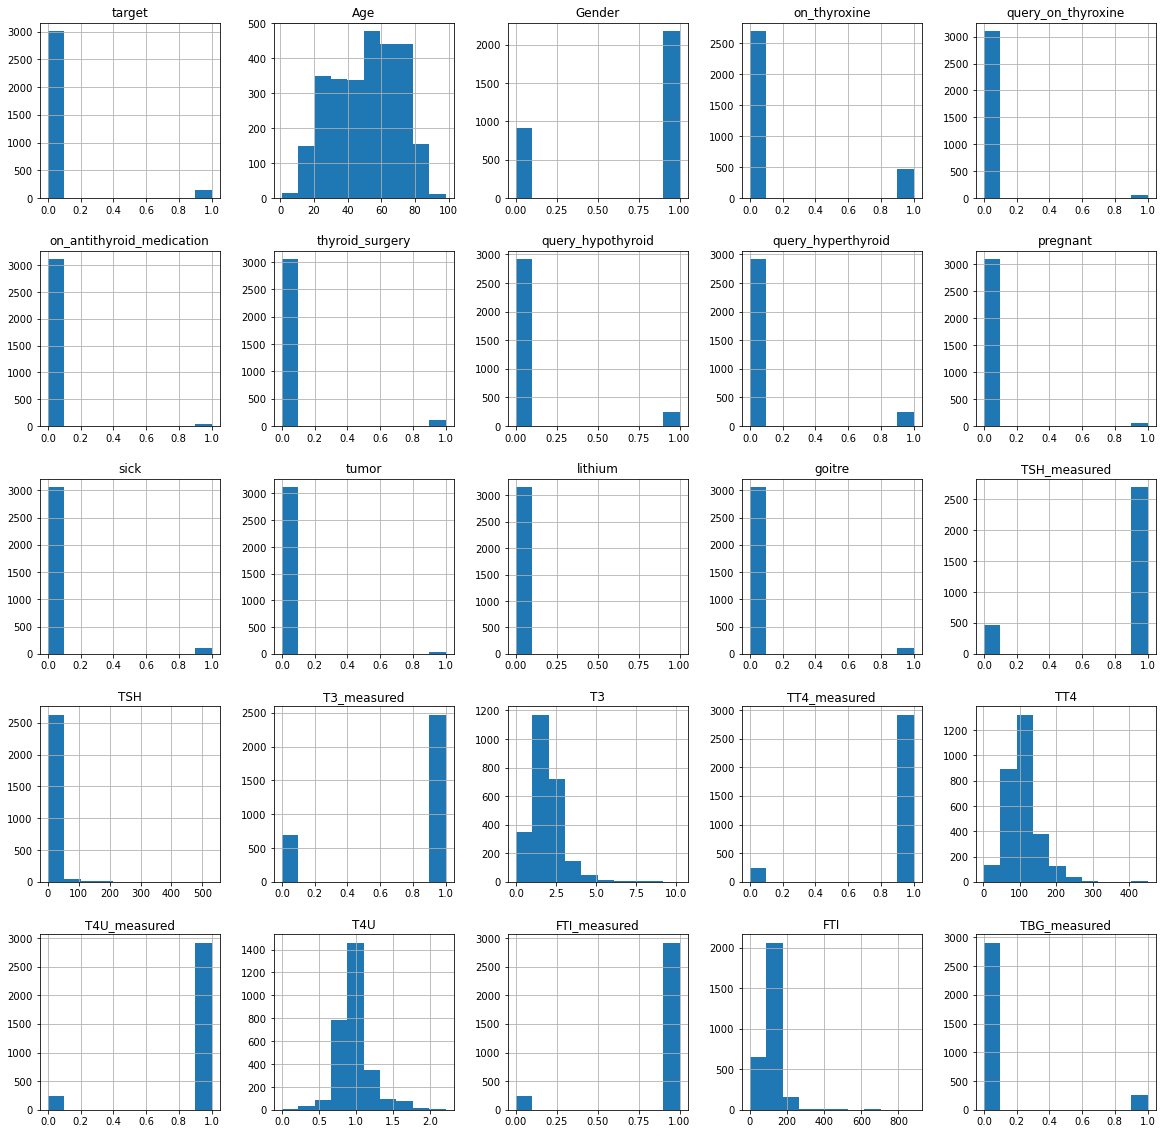

In [17]:
dataset.hist(figsize = (20,20));

### Replacing null values in our data

- We will now replace or impute the null values in our data with their appropriate statistical metric.

In [18]:
# List of columns containing null values
dataset.columns[dataset.isnull().any()].tolist() 

['Age', 'Gender', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

**Based on the statistics plotted above, we can see that,**

- The features "Age" and "T4U" show a normal distribution, which is why we will be replacing the missing values with mean.
- The features "TSH", "T3", "TT4" and "FTI" show a skewed distribution, which is why we will be replacing the missing values with median.
- The feature "gender" is binary and contains an imbalanced data with the values "1" much greater then "0". So we will be replacing the missing values with "0".

In [19]:
# Replacing null values by mean 
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)
dataset['T4U'].fillna(dataset['T4U'].mean(), inplace = True)

# Replacing null values by median
dataset['TSH'].fillna(dataset['TSH'].mean(), inplace = True)
dataset['T3'].fillna(dataset['T3'].median(), inplace = True)
dataset['TT4'].fillna(dataset['TT4'].median(), inplace = True)
dataset['FTI'].fillna(dataset['FTI'].median(), inplace = True)

# The gender data looks to be imbalanced with 0 lesser than 1
# Replacing null values with 0
dataset['Gender'].fillna(0, inplace = True)

### Visualize the imputed data

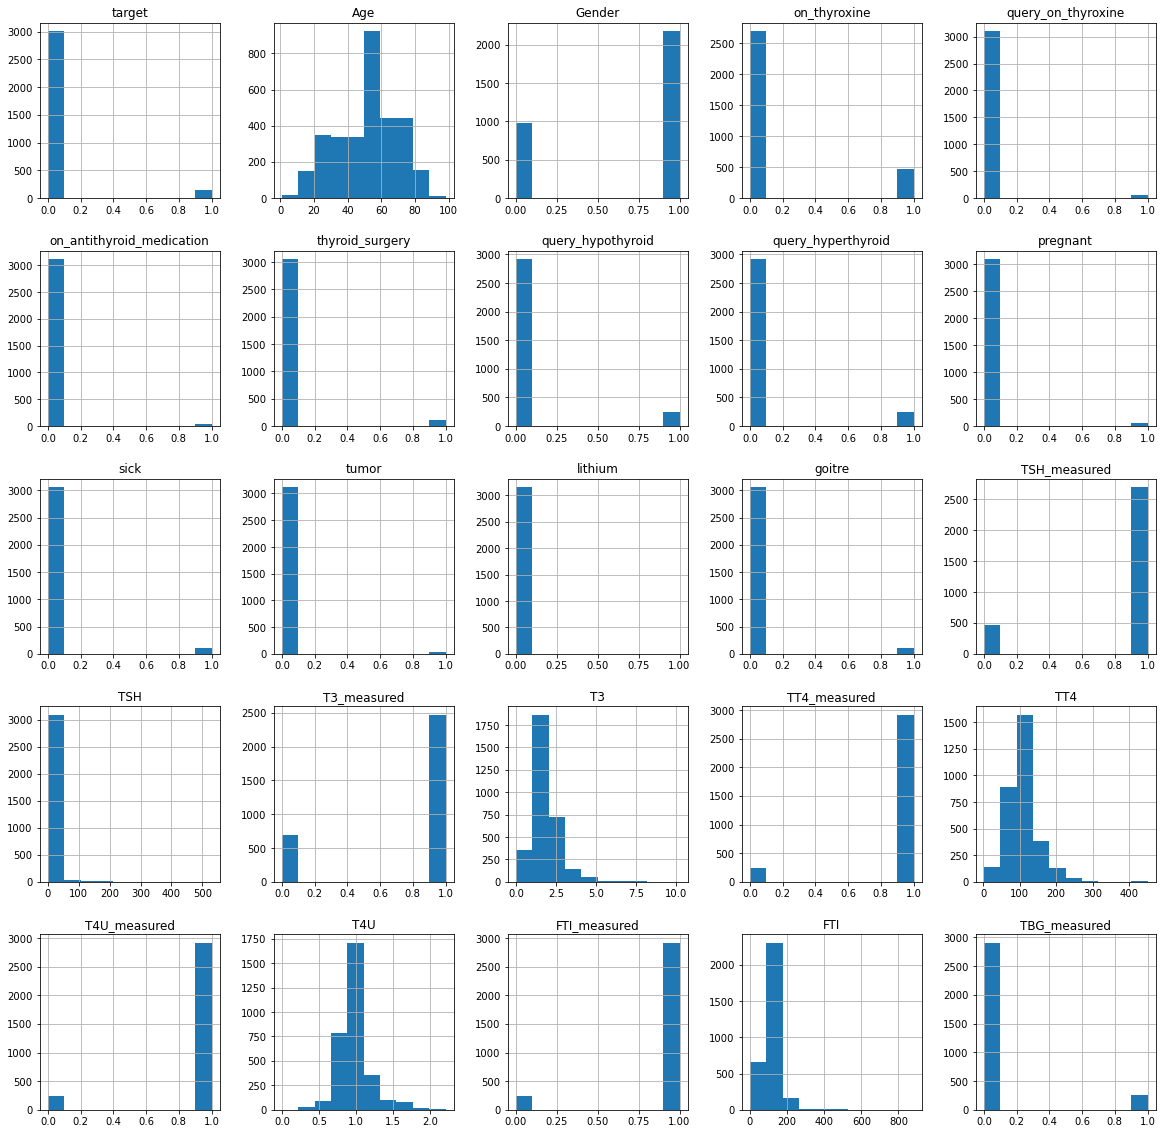

In [20]:
# Plot the histogram of different features
plot_cleaned = dataset.hist(figsize = (20,20))

### Checking for null values

We will again check the number of null values for each column.

In [21]:
# Check for the number of null values
dataset.isnull().sum()

target                       0
Age                          0
Gender                       0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

---
## Modeling the data

Our data is now cleaned and formatted. We are now ready to model the data for prediction using Deep Learning. We will be using a Neural network for predicting the **hypothyroidism (target)** based on our **input data (features).** 

### 1. Defining the features and target variables

We will be separating our dataset into features (X) and the target variable (y).

In [22]:
# Features
X = dataset.drop('target', axis = 1) # selecting all columns except the target
# Target variable
y = dataset['target']

In [23]:
print(X.shape, y.shape)

(3163, 24) (3163,)


### 2. Splitting the data into train (80%) and test (20%) data

In order to efficiently evaluate our model, we will be training our model on 80% of the data, and keep the rest 20% for testing the model.

In [24]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Scaling the train and test data 

Scaling the data helps in normalizing the data within a particular range and also helps in speeding up the calculations in an algorithm. For scaling the data, we will be using the `StandardScaler` class from scikit-learn.

In [25]:
from sklearn.preprocessing import StandardScaler

# Initialization of the class
scaler = StandardScaler()

# Applying the scaler on test and train data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Building the neural network

The scope of our project is to design a feed-forward neural network for classiﬁcation of our target variable. Several factors determine the performance of the model such as the input, hidden and output layer conﬁgurations and the training methodology used. Most of the neural network architectures are determined by experimentation in practice. Here, we are defining a neural network containing a sequential model with one hidden layer and one output layer. 

<img src="imgs/neural_network.png" width="600">

We have 24 feature columns due to which we have specified the input dimension as input_dim=24. We are using the ReLU activation function in the hidden layer, and sigmoid function for the output layer to return a binary value of output, i.e. hypothyroid (1) or negative (0).

In [26]:
# Input
model = Sequential()
# Hidden layer
model.add(Dense(64, kernel_initializer='uniform', input_dim=24, activation='relu'))
# Output layer
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

**Compiling the model with 'adam' optimizer and loss function as 'binary_crossentropy'.**

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5. Training the model

We will now train the model with a validation split of 0.2 for 100 epochs.

In [28]:
# Training the model
result = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/100
51/51 - 0s - loss: 0.6196 - accuracy: 0.8839 - val_loss: 0.5123 - val_accuracy: 0.9625
Epoch 2/100
51/51 - 0s - loss: 0.3767 - accuracy: 0.9565 - val_loss: 0.2401 - val_accuracy: 0.9644
Epoch 3/100
51/51 - 0s - loss: 0.1716 - accuracy: 0.9664 - val_loss: 0.1125 - val_accuracy: 0.9723
Epoch 4/100
51/51 - 0s - loss: 0.1012 - accuracy: 0.9704 - val_loss: 0.0758 - val_accuracy: 0.9802
Epoch 5/100
51/51 - 0s - loss: 0.0755 - accuracy: 0.9753 - val_loss: 0.0612 - val_accuracy: 0.9822
Epoch 6/100
51/51 - 0s - loss: 0.0641 - accuracy: 0.9773 - val_loss: 0.0541 - val_accuracy: 0.9842
Epoch 7/100
51/51 - 0s - loss: 0.0577 - accuracy: 0.9797 - val_loss: 0.0500 - val_accuracy: 0.9822
Epoch 8/100
51/51 - 0s - loss: 0.0537 - accuracy: 0.9807 - val_loss: 0.0476 - val_accuracy: 0.9822
Epoch 9/100
51/51 - 0s - loss: 0.0510 - accuracy: 0.9822 - val_loss: 0.0455 - val_accuracy: 0.9822
Epoch 10/100
51/51 - 0s - loss: 0.0491 - accuracy: 0.9827 - val_loss: 0.0439 - val_accuracy: 0.9802
Epoch 11/

Epoch 84/100
51/51 - 0s - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 85/100
51/51 - 0s - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.0349 - val_accuracy: 0.9881
Epoch 86/100
51/51 - 0s - loss: 0.0224 - accuracy: 0.9931 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 87/100
51/51 - 0s - loss: 0.0224 - accuracy: 0.9936 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 88/100
51/51 - 0s - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0344 - val_accuracy: 0.9881
Epoch 89/100
51/51 - 0s - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0341 - val_accuracy: 0.9881
Epoch 90/100
51/51 - 0s - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0344 - val_accuracy: 0.9881
Epoch 91/100
51/51 - 0s - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.0347 - val_accuracy: 0.9881
Epoch 92/100
51/51 - 0s - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0348 - val_accuracy: 0.9881
Epoch 93/100
51/51 - 0s - loss: 0.0217 - accuracy: 0.9946 - val_loss: 0.0340 - val_accuracy: 0.9862


### 6. Evaluating the model

We will now evaluate the performance of our trained model on test data to find metrics such as Accuracy, F1-score, recall, and precision.

**Accuracy**

In [29]:
# Get the loss and accuracy of the model by evaluation
loss, acc = model.evaluate(X_test, y_test)

# Print the loss and accuracy score for the model
print("%s: %.2f%%" % (model.metrics_names[0], loss*100))
print("%s: %.2f%%" % (model.metrics_names[1], acc*100))

20/20 [==============================] - 0s 549us/step - loss: 0.0644 - accuracy: 0.9810
loss: 6.44%
accuracy: 98.10%


We are getting a quite good accuracy of **98.26%** from our Deep Learning model. However, our data is imbalanced and hence accuracy is not a good measure. Hence, we will be using a metric called [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

**F1-score, Recall, Precision**

In [30]:
# Predicting the output predictions
y_pred = model.predict(X_test).round()

In [31]:
# Calculating the F1 score, recall, and precision
print("%s: %.2f%%" % ("F1-score", f1_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Recall", recall_score(y_test, y_pred)*100))
print("%s: %.2f%%" % ("Precision", precision_score(y_test, y_pred)*100))

F1-score: 82.86%
Recall: 78.38%
Precision: 87.88%


We are getting a quite good value of F1-score, recall and precision as well. Hence, our model seems to be performing well.

**Training and validation loss**

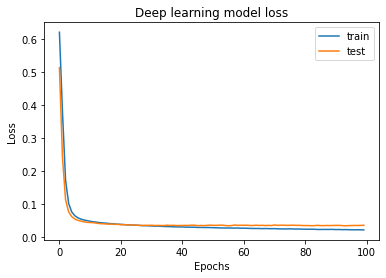

In [32]:
# summarize the result and plot the training and test loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

# Set the parameters
plt.title('Deep learning model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper right')

# Display the plots
plt.show()

We can see that both the losses have converged at a very good rate.

### 7. Saving the trained model

We can save our trained model for future use. We can then load the saved model using
`model = keras.models.load_model('path/to/savedmodel')`

In [34]:
# Save the trained model 
model.save('models/saved_model.h5')

## Conclusion

In this project, we have illustrated the potential use of neural networks in diagnosing hypothyroid disease. The identification of thyroid disease identiﬁcation remains to be an essential yet difﬁcult task in both clinical diagnosis and statistical classification. The diagnosis involves the use of a large number of interrelated patient attributes along with extremely unbalanced groups that result in a complicated relationship between the input features. However, Artiﬁcial neural networks show a promising result due to its flexible nature in modeling complex patterns of data for diagnosis. This knowledge can be further extended for many other disease diagnosis where such problems exist.